<a href="https://colab.research.google.com/github/mrohit01/CNN-model-for-fashion-MNIST-dataset/blob/main/CNN_model_for_fashion_MNIST_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the CNN model for thr Fashion Mnist Dataset

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# advance libraries

import keras
from keras.datasets import fashion_mnist

# Loading of the Dataset

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


In [ ]:
# checking what is present in the data

print(x_train.shape)
print(y_train.shape)
print("* "*10)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
* * * * * * * * * * 
(10000, 28, 28)
(10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
len(class_labels)

10

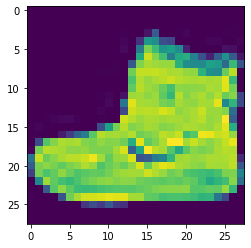

In [ ]:
plt.imshow(x_train[0])    # plt.imshow function is used to visuavalize the image

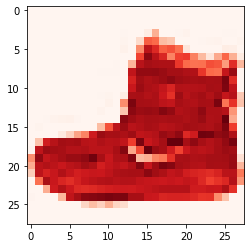

In [ ]:
plt.imshow(x_train[0],cmap="Reds")    # Reds,Greens,Blues,Greys

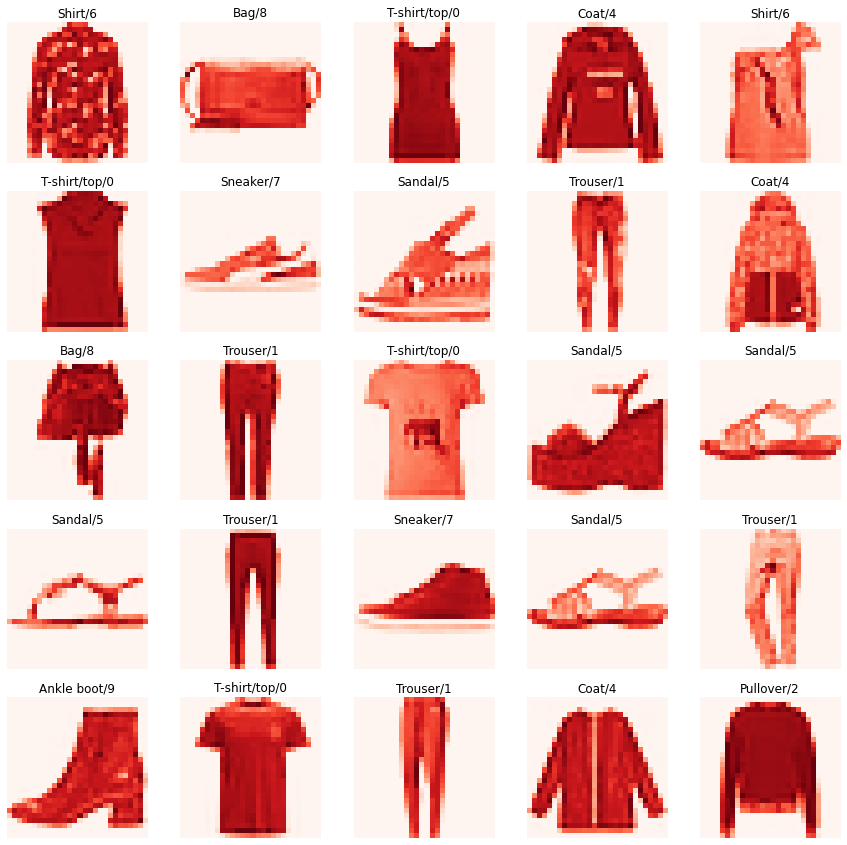

In [ ]:
plt.figure(figsize=(15,15))    # image size can be change from this parameter
j= 1

for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap="Reds")
  plt.axis("off")             # axis is kept of to see the image properly
  plt.title("{}/{}".format(class_labels[y_train[i]],y_train[i]))

# Changing the dimension of the image

In [ ]:
x_train.ndim

3

In [ ]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

# Feature scaling 

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# Splitting of the DataSet

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,random_state=42,train_size=0.8)

In [ ]:
x_train.shape

(48000, 28, 28, 1)

# Building Convolution Neural Network

In [ ]:
model = keras.models.Sequential([
                      keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding="valid",activation="relu",input_shape=[28,28,1]),
                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                      
                      keras.layers.Flatten(),
                      keras.layers.Dense(units=120,activation="relu"),
                      keras.layers.Dense(units=80,activation="relu"),
                      keras.layers.Dense(units=10,activation="softmax")

])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 120)               649080    
                                                                 
 dense_8 (Dense)             (None, 80)                9680      
                                                                 
 dense_9 (Dense)             (None, 10)                810       
                                                      

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=512,verbose=True,validation_data=(x_val,y_val))

Epoch 1/20
94/94 [==============================] - 2s 12ms/step - loss: 0.6331 - accuracy: 0.7859 - val_loss: 0.4170 - val_accuracy: 0.8521
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3834 - accuracy: 0.8663 - val_loss: 0.3536 - val_accuracy: 0.8758
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3368 - accuracy: 0.8817 - val_loss: 0.3331 - val_accuracy: 0.8816
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3076 - accuracy: 0.8938 - val_loss: 0.3215 - val_accuracy: 0.8865
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2903 - accuracy: 0.8978 - val_loss: 0.2967 - val_accuracy: 0.8916
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.2684 - accuracy: 0.9054 - val_loss: 0.2941 - val_accuracy: 0.8947
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2571 - accuracy: 0.9102 - val_loss: 0.2761 - val_accuracy: 0.9014
Epoch 8/20
94/94 [=

# Testing the model Predictions

In [ ]:
model.predict(np.expand_dims(x_test[0],axis=0)).round()

1/1 [==============================] - 0s 16ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_test[0]

9

In [ ]:
y_pred = model.predict(x_test).round()
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2601 - accuracy: 0.9093


[0.2601136863231659, 0.9093000292778015]

# Confusion matrix

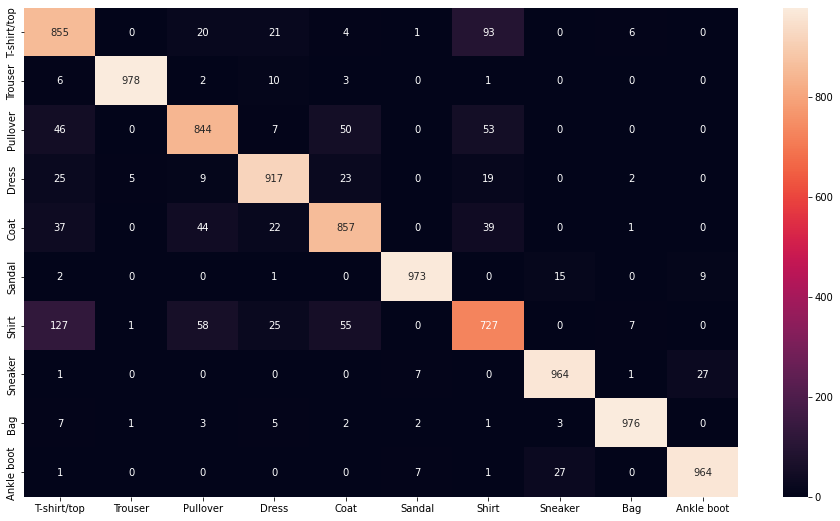

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cnf = confusion_matrix(y_test,y_pred_labels)

# to see the image of confusion matrix

sns.heatmap(cnf,annot=True,fmt="d",xticklabels=class_labels,yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report

clf = classification_report(y_test,y_pred_labels,target_names=class_labels)
print(clf)

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.85      0.81      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.86      0.86      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.78      0.73      0.75      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

